# Discover xarray

In this notebook we will take an example of "simulating" the kinetic energy for different masses and velocities. We start of doing the calculation in `numpy` and slowly transition to `xarray`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Let's say we are interested in simulating the kinetic energy for all combinations of the following values: 

In [2]:
v_mps = np.linspace(0, 10)
m_kg = np.linspace(3, 17)

In [3]:
v_mps

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

We can do that in the following way

In [4]:
Ekin_J = 0.5 * np.expand_dims(m_kg, 1) * v_mps**2
Ekin_J

array([[0.00000000e+00, 6.24739692e-02, 2.49895877e-01, ...,
        1.38004998e+02, 1.43940025e+02, 1.50000000e+02],
       [0.00000000e+00, 6.84238710e-02, 2.73695484e-01, ...,
        1.51148331e+02, 1.57648599e+02, 1.64285714e+02],
       [0.00000000e+00, 7.43737728e-02, 2.97495091e-01, ...,
        1.64291664e+02, 1.71357173e+02, 1.78571429e+02],
       ...,
       [0.00000000e+00, 3.42119355e-01, 1.36847742e+00, ...,
        7.55741655e+02, 7.88242994e+02, 8.21428571e+02],
       [0.00000000e+00, 3.48069257e-01, 1.39227703e+00, ...,
        7.68884988e+02, 8.01951568e+02, 8.35714286e+02],
       [0.00000000e+00, 3.54019159e-01, 1.41607663e+00, ...,
        7.82028322e+02, 8.15660142e+02, 8.50000000e+02]], shape=(50, 50))

Plotting it gives us some insights but it is hard to interpret because the axis have no labels and the ticks are based on the index of the array not on the values of v and m.

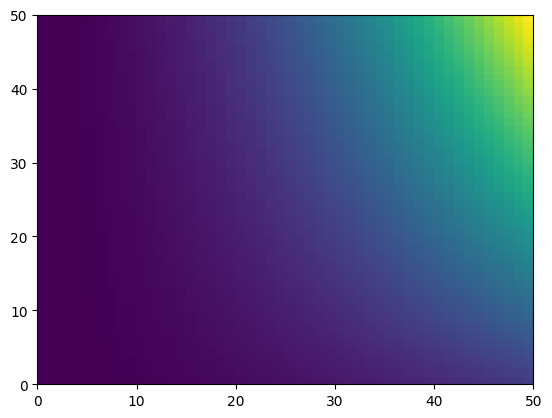

In [5]:
plt.pcolormesh(Ekin_J)

Doing calculations is possible but require remembering what axis is what:

In [6]:
# What is the average over all speeds
Ekin_J.mean(axis=1)

array([ 50.51020408,  55.32069971,  60.13119534,  64.94169096,
        69.75218659,  74.56268222,  79.37317784,  84.18367347,
        88.9941691 ,  93.80466472,  98.61516035, 103.42565598,
       108.2361516 , 113.04664723, 117.85714286, 122.66763848,
       127.47813411, 132.28862974, 137.09912536, 141.90962099,
       146.72011662, 151.53061224, 156.34110787, 161.1516035 ,
       165.96209913, 170.77259475, 175.58309038, 180.39358601,
       185.20408163, 190.01457726, 194.82507289, 199.63556851,
       204.44606414, 209.25655977, 214.06705539, 218.87755102,
       223.68804665, 228.49854227, 233.3090379 , 238.11953353,
       242.93002915, 247.74052478, 252.55102041, 257.36151603,
       262.17201166, 266.98250729, 271.79300292, 276.60349854,
       281.41399417, 286.2244898 ])

## Labeling the axes

We can use `xarray` to give names to the axes (now called dims), which makes interpretation much easier. 

In [7]:
import xarray as xr

In [8]:
v_mps = xr.DataArray(np.linspace(0, 10), dims="v_mps")
m_kg = xr.DataArray(np.linspace(3, 17), dims="m_kg")

Now you can see that the dim has the name `v_mps` and has a length of 50.

In [9]:
v_mps

<xarray.DataArray (v_mps: 50)> Size: 400B
array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])
Dimensions without coordinates: v_mps

Doing calculation is now simplified as `xarray` knows which axis to match and which to broadcast.

In [10]:
Ekin_J = 0.5 * m_kg * v_mps**2
Ekin_J

<xarray.DataArray (m_kg: 50, v_mps: 50)> Size: 20kB
array([[0.00000000e+00, 6.24739692e-02, 2.49895877e-01, ...,
        1.38004998e+02, 1.43940025e+02, 1.50000000e+02],
       [0.00000000e+00, 6.84238710e-02, 2.73695484e-01, ...,
        1.51148331e+02, 1.57648599e+02, 1.64285714e+02],
       [0.00000000e+00, 7.43737728e-02, 2.97495091e-01, ...,
        1.64291664e+02, 1.71357173e+02, 1.78571429e+02],
       ...,
       [0.00000000e+00, 3.42119355e-01, 1.36847742e+00, ...,
        7.55741655e+02, 7.88242994e+02, 8.21428571e+02],
       [0.00000000e+00, 3.48069257e-01, 1.39227703e+00, ...,
        7.68884988e+02, 8.01951568e+02, 8.35714286e+02],
       [0.00000000e+00, 3.54019159e-01, 1.41607663e+00, ...,
        7.82028322e+02, 8.15660142e+02, 8.50000000e+02]], shape=(50, 50))
Dimensions without coordinates: m_kg, v_mps

Plotting will now also indicate the name of the dim.

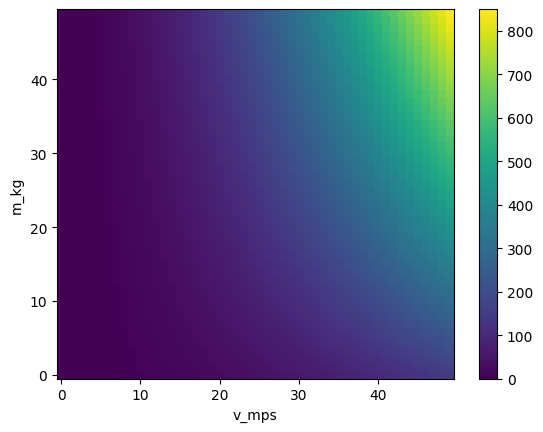

In [11]:
Ekin_J.plot()

Calculations can now be done without remembering the order of the axes as you just supply the name of the dim.

In [12]:
Ekin_J.mean("v_mps")

<xarray.DataArray (m_kg: 50)> Size: 400B
array([ 50.51020408,  55.32069971,  60.13119534,  64.94169096,
        69.75218659,  74.56268222,  79.37317784,  84.18367347,
        88.9941691 ,  93.80466472,  98.61516035, 103.42565598,
       108.2361516 , 113.04664723, 117.85714286, 122.66763848,
       127.47813411, 132.28862974, 137.09912536, 141.90962099,
       146.72011662, 151.53061224, 156.34110787, 161.1516035 ,
       165.96209913, 170.77259475, 175.58309038, 180.39358601,
       185.20408163, 190.01457726, 194.82507289, 199.63556851,
       204.44606414, 209.25655977, 214.06705539, 218.87755102,
       223.68804665, 228.49854227, 233.3090379 , 238.11953353,
       242.93002915, 247.74052478, 252.55102041, 257.36151603,
       262.17201166, 266.98250729, 271.79300292, 276.60349854,
       281.41399417, 286.2244898 ])
Dimensions without coordinates: m_kg

## Adding coordinates

It would be great if the plot would have directly the right ticks, coming from the mass and velocity and not the indexes of the array. In `xarray` this is called a coordinate. A coordinate is an array that "labels" a dimension.

In [13]:
v_mps_array = np.linspace(0, 10)
v_mps = xr.DataArray(v_mps, dims="v_mps", coords={"v_mps": v_mps_array})
m_kg_array = np.linspace(3, 17)
m_kg = xr.DataArray(m_kg_array, dims="m_kg", coords={"m_kg": m_kg_array})

You can now see that `v_mps` is bold and that means there is a coordinate associated with that dimension.

In [14]:
v_mps

<xarray.DataArray (v_mps: 50)> Size: 400B
array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])
Coordinates:
  * v_mps    (v_mps) float64 400B 0.0 0.2041 0.4082 0.6122 ... 9.592 9.796 10.0

In [15]:
Ekin_J = 0.5 * m_kg * v_mps**2
Ekin_J

<xarray.DataArray (m_kg: 50, v_mps: 50)> Size: 20kB
array([[0.00000000e+00, 6.24739692e-02, 2.49895877e-01, ...,
        1.38004998e+02, 1.43940025e+02, 1.50000000e+02],
       [0.00000000e+00, 6.84238710e-02, 2.73695484e-01, ...,
        1.51148331e+02, 1.57648599e+02, 1.64285714e+02],
       [0.00000000e+00, 7.43737728e-02, 2.97495091e-01, ...,
        1.64291664e+02, 1.71357173e+02, 1.78571429e+02],
       ...,
       [0.00000000e+00, 3.42119355e-01, 1.36847742e+00, ...,
        7.55741655e+02, 7.88242994e+02, 8.21428571e+02],
       [0.00000000e+00, 3.48069257e-01, 1.39227703e+00, ...,
        7.68884988e+02, 8.01951568e+02, 8.35714286e+02],
       [0.00000000e+00, 3.54019159e-01, 1.41607663e+00, ...,
        7.82028322e+02, 8.15660142e+02, 8.50000000e+02]], shape=(50, 50))
Coordinates:
  * m_kg     (m_kg) float64 400B 3.0 3.286 3.571 3.857 ... 16.43 16.71 17.0
  * v_mps    (v_mps) float64 400B 0.0 0.2041 0.4082 0.6122 ... 9.592 9.796 10.0

Now plotting will know how to label your x and y axis.

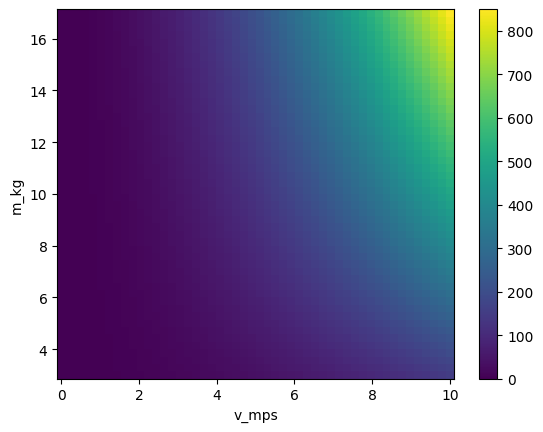

In [16]:
Ekin_J.plot()

## Adding metadeta

Let's start adding labels and units so that the plotting is directly correct.\
'long_name' and 'units' are special attributes of DataArrays.

In [17]:
Ekin_J.v_mps.attrs = {"long_name": "Velocity", "units": "m/s"}
Ekin_J.m_kg.attrs = {"long_name": "Mass", "units": "kg"}
Ekin_J.attrs = {"long_name": "Energy", "units": "J"}
Ekin_J

<xarray.DataArray (m_kg: 50, v_mps: 50)> Size: 20kB
array([[0.00000000e+00, 6.24739692e-02, 2.49895877e-01, ...,
        1.38004998e+02, 1.43940025e+02, 1.50000000e+02],
       [0.00000000e+00, 6.84238710e-02, 2.73695484e-01, ...,
        1.51148331e+02, 1.57648599e+02, 1.64285714e+02],
       [0.00000000e+00, 7.43737728e-02, 2.97495091e-01, ...,
        1.64291664e+02, 1.71357173e+02, 1.78571429e+02],
       ...,
       [0.00000000e+00, 3.42119355e-01, 1.36847742e+00, ...,
        7.55741655e+02, 7.88242994e+02, 8.21428571e+02],
       [0.00000000e+00, 3.48069257e-01, 1.39227703e+00, ...,
        7.68884988e+02, 8.01951568e+02, 8.35714286e+02],
       [0.00000000e+00, 3.54019159e-01, 1.41607663e+00, ...,
        7.82028322e+02, 8.15660142e+02, 8.50000000e+02]], shape=(50, 50))
Coordinates:
  * m_kg     (m_kg) float64 400B 3.0 3.286 3.571 3.857 ... 16.43 16.71 17.0
  * v_mps    (v_mps) float64 400B 0.0 0.2041 0.4082 0.6122 ... 9.592 9.796 10.0
Attributes:
    long_name:  Energy
    units:      J

Clicking the document icon behind the coordinates allows you to inspect the attrs.

This gives us the desired plot directly.

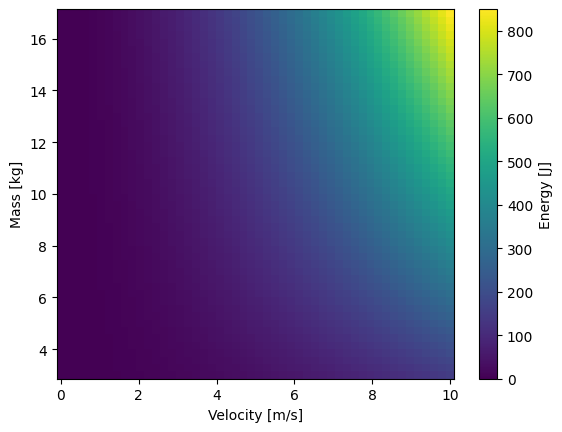

In [18]:
Ekin_J.plot()

## Using a dataset

The workflow can be simplified by using a `Dataset` from `xarray`. You can see the `Dataset` as a dictionary holding many `DataArrays`, which can share dimensions and coordinates.

You can read and write something to a dataset using the `ds["name"]` notation. You can only read using the `ds.name` notation.

Assigning a `numpy` array to a dataset directly sets it as a coordinate.

In [19]:
ds = xr.Dataset()
ds["v_mps"] = np.linspace(0, 10)
ds.v_mps.attrs = {"long_name": "Velocity", "units": "m/s"}
ds["m_kg"] = np.linspace(3, 17)
ds.m_kg.attrs = {"long_name": "Mass", "units": "kg"}
ds["Ekin_J"] = 0.5 * ds.m_kg * ds.v_mps**2
ds.Ekin_J.attrs = {"long_name": "Energy", "units": "J"}
ds

<xarray.Dataset> Size: 21kB
Dimensions:  (v_mps: 50, m_kg: 50)
Coordinates:
  * v_mps    (v_mps) float64 400B 0.0 0.2041 0.4082 0.6122 ... 9.592 9.796 10.0
  * m_kg     (m_kg) float64 400B 3.0 3.286 3.571 3.857 ... 16.43 16.71 17.0
Data variables:
    Ekin_J   (m_kg, v_mps) float64 20kB 0.0 0.06247 0.2499 ... 782.0 815.7 850.0

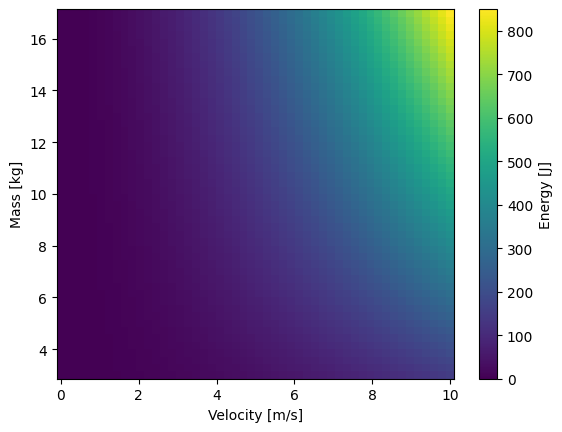

In [20]:
ds.Ekin_J.plot()

## Using a function (clean coding)

Now let's clean up the code by making use of a function:

In [21]:
def kinetic_energy_J(m_kg, v_mps):
    return 0.5 * m_kg * v_mps**2


ds = xr.Dataset()
ds["v_mps"] = np.linspace(0, 10)
ds.v_mps.attrs = {"long_name": "Velocity", "units": "m/s"}
ds["m_kg"] = np.linspace(3, 17)
ds.m_kg.attrs = {"long_name": "Mass", "units": "kg"}
ds["Ekin_J"] = kinetic_energy_J(ds.m_kg, ds.v_mps)
ds.Ekin_J.attrs = {"long_name": "Energy", "units": "J"}
ds

<xarray.Dataset> Size: 21kB
Dimensions:  (v_mps: 50, m_kg: 50)
Coordinates:
  * v_mps    (v_mps) float64 400B 0.0 0.2041 0.4082 0.6122 ... 9.592 9.796 10.0
  * m_kg     (m_kg) float64 400B 3.0 3.286 3.571 3.857 ... 16.43 16.71 17.0
Data variables:
    Ekin_J   (m_kg, v_mps) float64 20kB 0.0 0.06247 0.2499 ... 782.0 815.7 850.0

## Using xr.apply_ufunc (clean coding and very powerful)

The function call can also be done using `xr.apply_ufunc`. Eventhough the advantage is not clear now, it will be in the next notebook.

In [22]:
def kinetic_energy_J(m_kg, v_mps):
    return 0.5 * m_kg * v_mps**2


ds = xr.Dataset()
ds["v_mps"] = np.linspace(0, 10)
ds.v_mps.attrs = {"long_name": "Velocity", "units": "m/s"}
ds["m_kg"] = np.linspace(3, 17)
ds.m_kg.attrs = {"long_name": "Mass", "units": "kg"}
ds["Ekin_J"] = xr.apply_ufunc(kinetic_energy_J, ds.m_kg, ds.v_mps)
ds.Ekin_J.attrs = {"long_name": "Energy", "units": "J"}
ds

<xarray.Dataset> Size: 21kB
Dimensions:  (v_mps: 50, m_kg: 50)
Coordinates:
  * v_mps    (v_mps) float64 400B 0.0 0.2041 0.4082 0.6122 ... 9.592 9.796 10.0
  * m_kg     (m_kg) float64 400B 3.0 3.286 3.571 3.857 ... 16.43 16.71 17.0
Data variables:
    Ekin_J   (m_kg, v_mps) float64 20kB 0.0 0.06247 0.2499 ... 782.0 815.7 850.0